In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
%matplotlib inline

In [2]:
auto = pd.read_csv("Automobile_data.csv")
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


<function matplotlib.pyplot.show(close=None, block=None)>

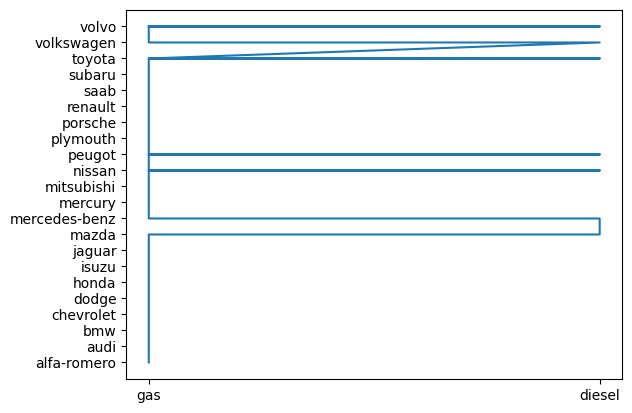

In [3]:
plt.plot(auto["fuel-type"], auto["make"])
plt.show

In [4]:
brand_vs_fuel = auto.groupby(["make","fuel-type"]).size().unstack(fill_value=0)
brand_vs_fuel

fuel-type,diesel,gas
make,,
alfa-romero,0,3
audi,0,7
bmw,0,8
chevrolet,0,3
dodge,0,9
honda,0,13
isuzu,0,4
jaguar,0,3
mazda,2,15


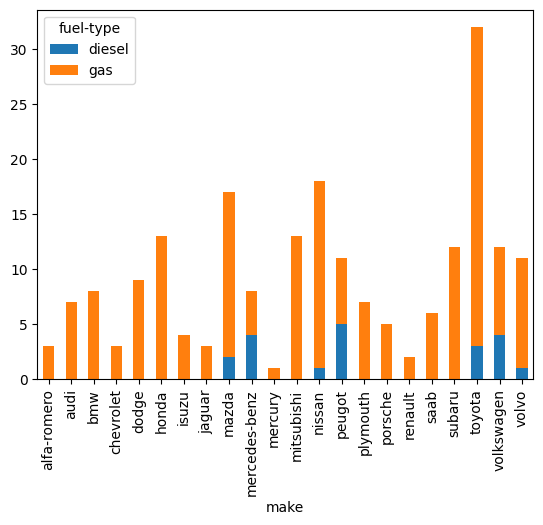

In [5]:
brand_vs_fuel.plot(kind='bar',stacked=True)
plt.show()

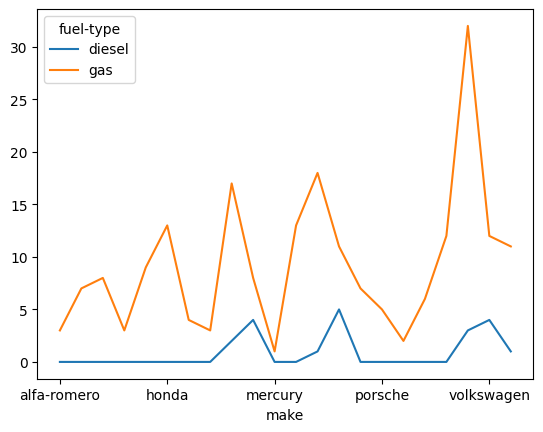

In [6]:
brand_vs_fuel.plot(kind='line',stacked=True)
plt.show()

In [7]:
famly_car = auto.groupby(["make","num-of-doors"]).size().unstack(fill_value=0)
famly_car

num-of-doors,?,four,two
make,,,
alfa-romero,0,0,3
audi,0,5,2
bmw,0,5,3
chevrolet,0,1,2
dodge,1,4,4
honda,0,5,8
isuzu,0,2,2
jaguar,0,2,1
mazda,1,7,9


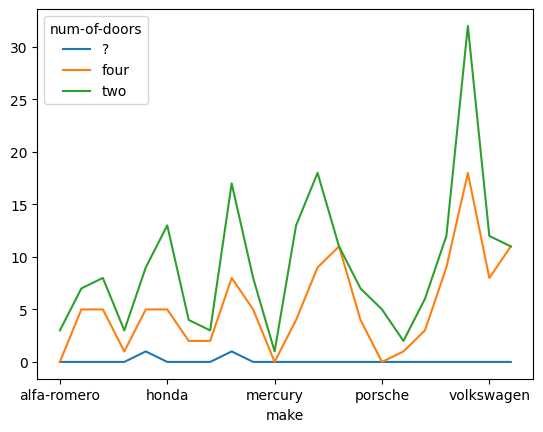

In [8]:
famly_car.plot(kind='line',stacked=True)
plt.show()

In [9]:
def pc(p):
        if p =='?':
            return "Invalied"
        p=int(p)
        if p>0 and p<= 10000:
            return "low buget car"
        elif p>=10000 and p<=20000:
            return "medium buget car"
        elif p>=20000 and p<= 30000:
            return "High end car"
        elif p>=30000 and p<=40000:
            return "luxary car"
        else:
            return "out of buget"
                
auto["Type"] = auto["price"].apply(pc)
auto

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,Type
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,medium buget car
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,medium buget car
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,medium buget car
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.4,10.0,102,5500,24,30,13950,medium buget car
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.4,8.0,115,5500,18,22,17450,medium buget car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845,medium buget car
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,medium buget car
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,High end car
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.4,23.0,106,4800,26,27,22470,High end car


In [10]:
gg = auto.groupby(["make","Type"]).size().unstack(fill_value=0)
gg

Type,High end car,Invalied,low buget car,luxary car,medium buget car,out of buget
make,,,,,,
alfa-romero,0,0,0,0,3,0
audi,1,1,0,0,5,0
bmw,3,0,0,2,2,1
chevrolet,0,0,3,0,0,0
dodge,0,0,8,0,1,0
honda,0,0,10,0,3,0
isuzu,0,2,1,0,1,0
jaguar,0,0,0,3,0,0
mazda,0,0,7,0,10,0


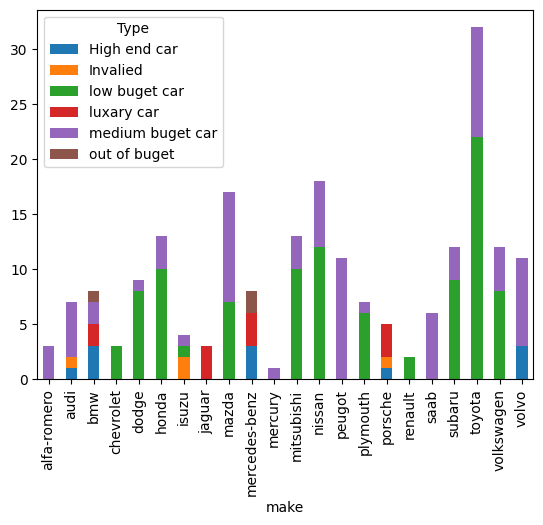

In [11]:
gg.plot(kind='bar',stacked=True)
plt.show()

In [12]:
auto.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'Type'],
      dtype='object')

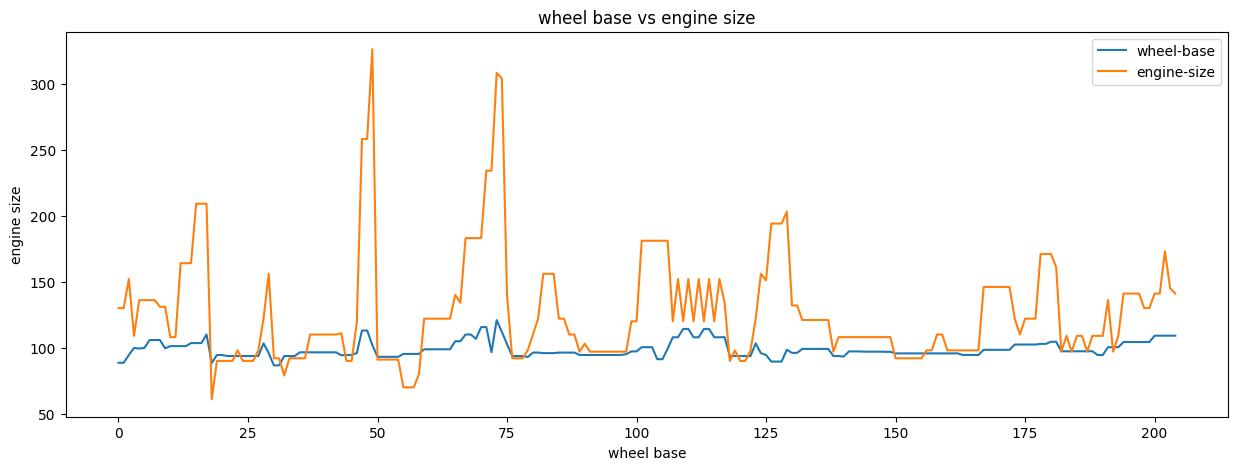

In [20]:
plt.figure(figsize=(15,5))
sns.lineplot(data=auto["wheel-base"],linewidth=1.5,label="wheel-base")
sns.lineplot(data=auto['engine-size'],linewidth=1.5,label='engine-size')

plt.title("wheel base vs engine size")
plt.xlabel("wheel base")
plt.ylabel("engine size")

plt.show()

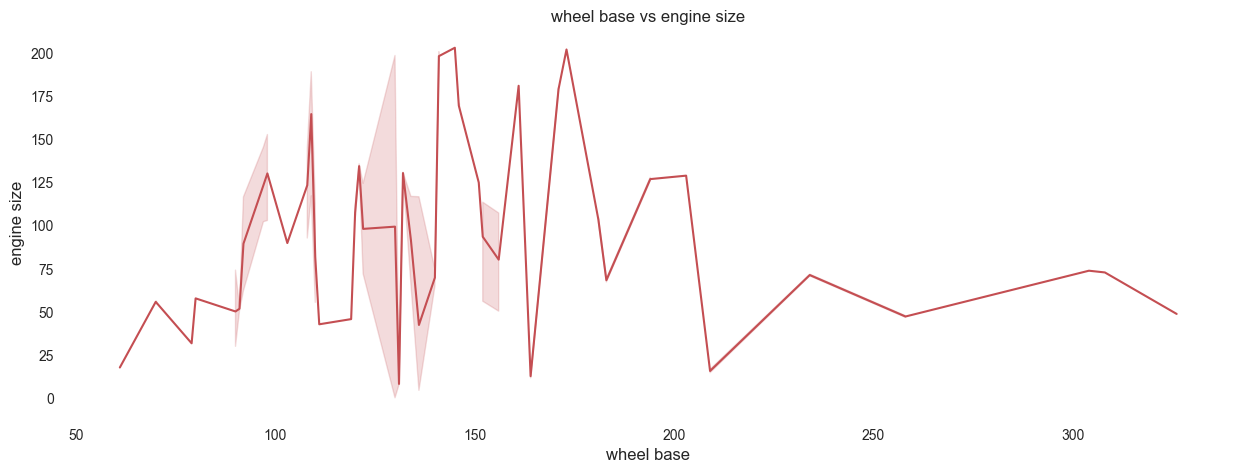

In [27]:
#for dependent values:-
plt.figure(figsize=(15,5))

sns.set(rc={"axes.facecolor":"#FFFFFF","axes.grid":False,"xtick.labelsize":10,"ytick.labelsize":10})
plt.title("wheel base vs engine size")
plt.xlabel("wheel base")
plt.ylabel("engine size")

sns.lineplot(x=auto["engine-size"],y=auto["wheel-base"].index.values,color='r')
plt.show()